In [1]:
using PyPlot
using DataFrames
using CSV
import Statistics
import Plots

In [2]:
PyPlot.matplotlib.style.use("default-color")

In [3]:
# rcParams = PyPlot.PyDict(PyPlot.matplotlib."rcParams")
# rcParams["axes.grid"] = false
# rcParams["mathtext.fontset"] = "stix"
# PyPlot.matplotlib.use("pgf")
# rcParams["pgf.texsystem"] = "pdflatex"
# rcParams["font.family"] = "serif"
# rcParams["text.usetex"] = true
# rcParams["pgf.rcfonts"] = false
# rcParams["pgf.preamble"] = "\\usepackage[T1]{fontenc} \\usepackage{newtxtext} \\usepackage{newtxmath}";

In [4]:
include("./src/loop_function.jl")
include("./src/tmat.jl")
include("./src/tmat_up_to_nlo.jl")
include("./src/par.jl")
include("./src/subtraction_cons.jl")

subtraction_cons_tuple (generic function with 1 method)

In [5]:
Plots.palette(:default)

In [6]:
Plots.palette(:tab10)

In [7]:
color = Tuple(["#" * Plots.hex(cc) for cc in Plots.palette(:default)] )

("#009AFA", "#E36F47", "#3EA44E", "#C371D2", "#AC8E18", "#00AAAE", "#ED5E93", "#C68225", "#00A98D", "#8E971E", "#00A9CC", "#9B7FE9", "#618DF6", "#F06073", "#DD65B6", "#6C9F33")

In [8]:
colort = Tuple(["#" * Plots.hex(cc) for cc in Plots.palette(:tab10)] )

("#1F77B4", "#FF7F0E", "#2CA02C", "#D62728", "#9467BD", "#8C564B", "#E377C2", "#7F7F7F", "#BCBD22", "#17BECF")

In [9]:
#PyPlot.matplotlib.style.use("gadfly")
#PyPlot.matplotlib.style.use("pacoty")
#PyPlot.matplotlib.style.use("dark_background")
#PyPlot.matplotlib.style.use("Plots-color")

In [10]:
data_path = "./lambda1405_data/lambda1405_data/";

In [11]:
Kmp_to_Kbar0n = CSV.read(data_path * "Kmp_to_Kbar0n.csv", DataFrame)
Kmp_to_Kmp = CSV.read(data_path * "Kmp_to_Kmp.csv", DataFrame)
Kmp_to_Lampi0 = CSV.read(data_path * "Kmp_to_Lampi0.csv", DataFrame)
Kmp_to_Sig0pi0 = CSV.read(data_path * "Kmp_to_Sig0pi0.csv", DataFrame)
Kmp_to_Sigmpip = CSV.read(data_path * "Kmp_to_Sigmpip.csv", DataFrame)
Kmp_to_Sigppim = CSV.read(data_path * "Kmp_to_Sigppim.csv", DataFrame);
wmin = 1432
wmin1, wmin2, wmin3, wmin4, wmin5, wmin6 = [wmin, wmin, wmin, wmin, wmin, wmin]#map(minimum, [Kmp_to_Kmp.Ecm, Kmp_to_Sigppim.Ecm, Kmp_to_Sig0pi0.Ecm, Kmp_to_Kbar0n.Ecm, Kmp_to_Sigmpip.Ecm, Kmp_to_Lampi0.Ecm]) .*1e3
stepp = 0.1
w1 = wmin1:stepp:1550
w2 = wmin2:stepp:1550
w3 = wmin3:stepp:1550
w4 = wmin4:stepp:1550
w5 = wmin5:stepp:1550
w6 = wmin6:stepp:1550

1432.0:0.1:1550.0

# Two-body propagator

In [12]:
w = 1350:0.1:1550
g2 = [Gdr(ww, (495, 938), -1.84, rs=:rs1) for ww in w];
g22 = [Gdr(ww, (495, 938), -1.84, rs=:rs2) for ww in w];

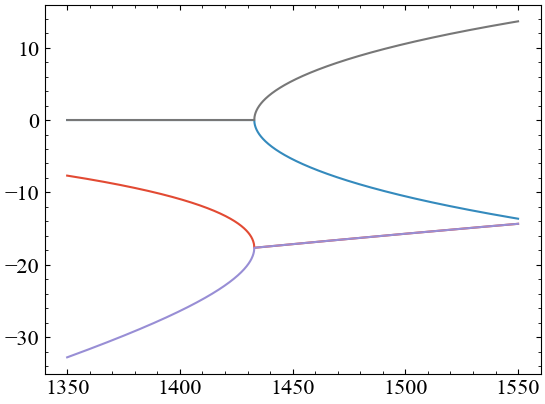

In [13]:
fig, ax = PyPlot.subplots()
ax.plot(w, real(g2))
ax.plot(w, imag(g2))
ax.plot(w, real(g22))
ax.plot(w, imag(g22))
gcf()

# $\Lambda(1405)$ in two-coupled channel scattering

At LO, the $\Lambda(1405)$ can be dynamical generated in $\pi\Sigma-\bar{K}N$ coupled-channel scattering. There are two pole-structure can be found.

In [14]:
const mu = 630e0
const qmaxLO = 632e0;
const qmax_nlo = 645.4573381257597
qmaxLO_sample = qmaxLO - 90:qmaxLO+90;

In [15]:
par = phy_par_degenrate()

Dict{Symbol, Any} with 4 entries:
  :threshold  => [1331.19, 1434.58, 1663.19, 1813.71]
  :mch        => [(138.039, 1193.15), (495.665, 938.919), (547.51, 1115.68), (4…
  :meson_mass => (138.039, 495.665)
  :decons     => 100.69

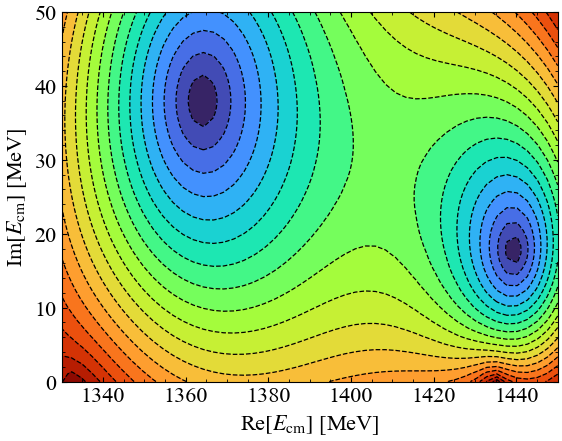

In [16]:
dims = 50
rew = range(1330, 1450, dims)
imww = 50
imw = range(-0, imww, dims)

fig, ax = PyPlot.subplots()
plot_tdet_lo_degenrate(ax, rew, imw, par, C_mat(), (-2.20171920047201, -1.9166904778651384))
gcf()

* Pole positions of the $\Lambda(1405)$ up to NLO

In [17]:
b = (-0.664609603537589, 0.062434962905761365, -0.35384103271852047)
d = (-0.46011427499158786, 0.05501054906425522, -0.06775661407295062, -0.5884345325719142)

anlo = Tuple([subtraction_cons(mchi, mu, qmax_nlo) for mchi in par[:mch] ] );

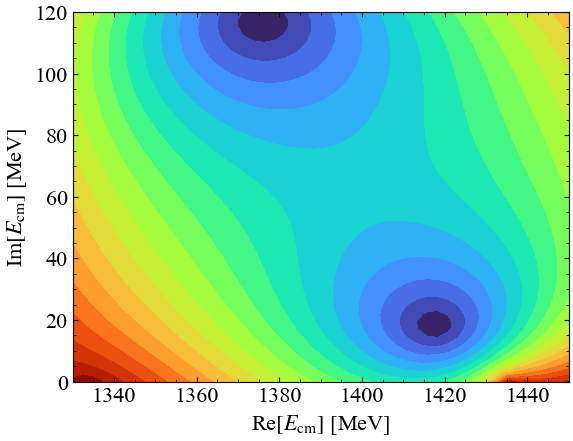

In [18]:
dims = 50
rew = range(1330, 1450, dims)
imww = 120
imw = range(-0, imww, dims)
DD = Dmat(par, b)
LL = Lmat(d)
fig, ax = PyPlot.subplots()
plot_tdet_up_to_nlo_degen(ax, rew, imw, par, C_mat(), DD, LL, anlo)
gcf()

In [19]:
aLO = (-2.20171920047201, -1.9166904778651384)
# [1439f0, -20f0] and [1439e0, -20e0] will give different soulation. I don't know why. It is better to choose the later one.
pH = pole_lo_degen([1439e0, -10e0], par, C_mat(), aLO)

1439.3380712158148 - 17.772722556871038im

In [20]:
pL = pole_lo_degen([1364e0, -40e0], par, C_mat(), aLO)

1364.0251723088506 - 38.01682139636592im

In [21]:
par_phy_channel = par_physical_channel()
aLO_phy_channel = Tuple([subtraction_cons(par_phy_channel[:mch][i], mu, qmaxLO) for i in 1:6] )
anlo_phy_channel = Tuple(subtraction_cons(par_phy_channel[:mch][i], mu, qmax_nlo) for i in 1:6);

# Explanation of the experimental data

In [22]:
par_phy_channel

Dict{Symbol, Any} with 4 entries:
  :threshold  => [1431.95, 1328.94, 1327.62, 1437.22, 1337.02, 1250.66]
  :mch        => [(493.68, 938.272), (139.57, 1189.37), (134.977, 1192.64), (49…
  :meson_mass => (139.57, 134.977, 139.57, 497.65, 493.68)
  :decons     => 100.69

In [23]:


# LO
sigma_lo_11 = [dist_lo(ww, par_phy_channel, lecs_cij(), aLO_phy_channel, :ch11) for ww in w1];
sigma_lo_12 = [dist_lo(ww, par_phy_channel, lecs_cij(), aLO_phy_channel, :ch12) for ww in w2];
sigma_lo_13 = [dist_lo(ww, par_phy_channel, lecs_cij(), aLO_phy_channel, :ch13) for ww in w3];
sigma_lo_14 = [dist_lo(ww, par_phy_channel, lecs_cij(), aLO_phy_channel, :ch14) for ww in w4];
sigma_lo_15 = [dist_lo(ww, par_phy_channel, lecs_cij(), aLO_phy_channel, :ch15) for ww in w5]
sigma_lo_16 = [dist_lo(ww, par_phy_channel, lecs_cij(), aLO_phy_channel, :ch16) for ww in w6];
# LO + NLO
CC = lecs_cij()
DD = lec_bi(par_phy_channel, b)
LL = lec_di(d)
sigma_nlo_11 = [dist_up_to_nlo_swave(ww, par_phy_channel, CC, DD, LL, anlo_phy_channel, :ch11) for ww in w1]
sigma_nlo_12 = [dist_up_to_nlo_swave(ww, par_phy_channel, CC, DD, LL, anlo_phy_channel, :ch12) for ww in w2]
sigma_nlo_13 = [dist_up_to_nlo_swave(ww, par_phy_channel, CC, DD, LL, anlo_phy_channel, :ch13) for ww in w3]
sigma_nlo_14 = [dist_up_to_nlo_swave(ww, par_phy_channel, CC, DD, LL, anlo_phy_channel, :ch14) for ww in w4]
sigma_nlo_15 = [dist_up_to_nlo_swave(ww, par_phy_channel, CC, DD, LL, anlo_phy_channel, :ch15) for ww in w5]
sigma_nlo_16 = [dist_up_to_nlo_swave(ww, par_phy_channel, CC, DD, LL, anlo_phy_channel, :ch16) for ww in w6];

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


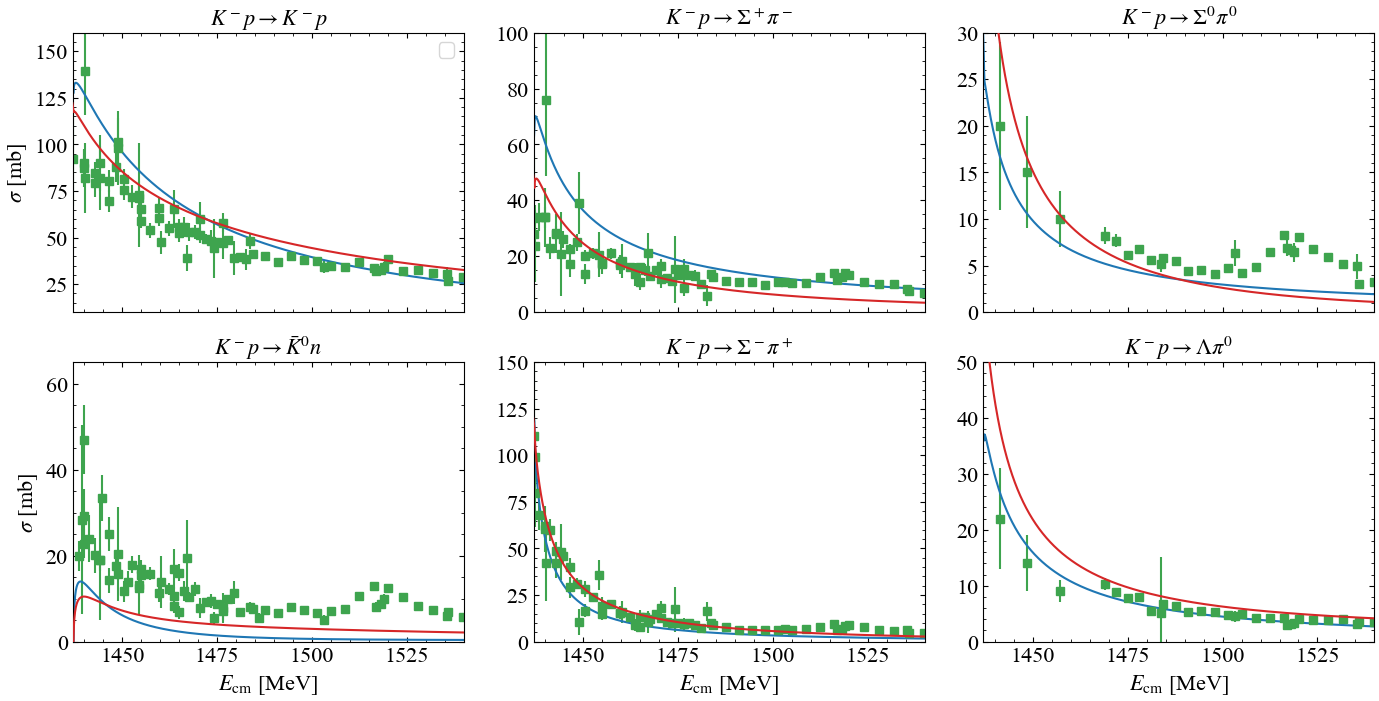

In [24]:
fig, ax = PyPlot.subplots(2, 3, figsize=(14, 7), layout="constrained", sharex=true)
cc = color[3]#:b#color[1]
mfc = cc
ax[1, 1].errorbar(Kmp_to_Kmp.Ecm, Kmp_to_Kmp.sigma, yerr=Kmp_to_Kmp.dsigma, fmt="s", c=cc, mfc=mfc)
ax[1, 2].errorbar(Kmp_to_Sigppim.Ecm, Kmp_to_Sigppim.sigma, yerr=Kmp_to_Sigppim.dsigma, fmt="s", c=cc, mfc=mfc)
ax[1, 3].errorbar(Kmp_to_Sig0pi0.Ecm, Kmp_to_Sig0pi0.sigma, yerr=Kmp_to_Sig0pi0.dsigma, fmt="s", c=cc, mfc=mfc)

ax[2, 1].errorbar(Kmp_to_Kbar0n.Ecm, Kmp_to_Kbar0n.sigma, Kmp_to_Kbar0n.dsigma, fmt="s", c=cc, mfc=mfc)
ax[2, 2].errorbar(Kmp_to_Sigmpip.Ecm, Kmp_to_Sigmpip.sigma, Kmp_to_Sigmpip.dsigma, fmt="s", c=cc, mfc=mfc)
ax[2, 3].errorbar(Kmp_to_Lampi0.Ecm, Kmp_to_Lampi0.sigma, Kmp_to_Lampi0.dsigma, fmt="s", c=cc, mfc=mfc)

axtitle = [L"K^- p \to K^- p", L"K^- p \to \bar{K}^0 n", L"K^- p \to \Sigma^+ \pi^-", L"K^- p \to \Sigma^- \pi^+", L"K^- p \to \Sigma^0 \pi^0", L"K^- p \to \Lambda \pi^0"]

zorder = 2
zorder1 = 4
# Predicted by model with parameter fixed by energy levels
cc1 = colort[4]
ax[1, 1].plot(w1, sigma_lo_11, c=cc1, zorder = zorder1)
ax[1, 2].plot(w2, sigma_lo_12, c=cc1, zorder = zorder1)
ax[1, 3].plot(w3, sigma_lo_13, c=cc1, zorder = zorder1)
ax[2, 1].plot(w4, sigma_lo_14, c=cc1, zorder = zorder1)
ax[2, 2].plot(w5, sigma_lo_15, c=cc1, zorder = zorder1)
ax[2, 3].plot(w6, sigma_lo_16, c=cc1, zorder = zorder1)
# error band at LO


# LO + NLO
cc2 = colort[1]
ax[1, 1].plot(w1, sigma_nlo_11, c=cc2, zorder = zorder)
ax[1, 2].plot(w2, sigma_nlo_12, c=cc2, zorder = zorder)
ax[1, 3].plot(w3, sigma_nlo_13, c=cc2, zorder = zorder)
ax[2, 1].plot(w4, sigma_nlo_14, c=cc2, zorder = zorder)
ax[2, 2].plot(w5, sigma_nlo_15, c=cc2, zorder = zorder)
ax[2, 3].plot(w6, sigma_nlo_16, c=cc2, zorder = zorder)



ylim = [(10, 160), (0, 65), (0, 100), (0, 150), (0, 30), (0, 50)]

for (axx, yl, title) in zip(vec(ax), ylim, axtitle)
    axx.set(xlim=(1437, 1540), ylim=yl)
    axx.set_title(title)#, y=0.85, loc=:right)
end
for axx in ax[2, :]
    axx.set(xlabel=L"$E_\mathrm{cm}$ [MeV]")
end
ax[1, 1].set_ylabel(L"$\sigma$ [mb]")
ax[2, 1].set_ylabel(L"$\sigma$ [mb]")
ax[1, 1].legend()

gcf()

In [25]:
fitted_par_sample = CSV.read("./out/params_4ch_1sigma.csv", DataFrame)[1000:2900, [:d1, :d2, :d3, :d4, :lam]];
first(fitted_par_sample, 4)

Row,d1,d2,d3,d4,lam
,Float64,Float64,Float64,Float64,Float64
1,-0.423357,0.0668167,-0.0803938,-0.61711,674.86
2,-0.511216,0.0562525,-0.100339,-0.515089,642.899
3,-0.455694,0.0564471,-0.0407747,-0.609968,647.561
4,-0.45484,0.0625415,-0.0471892,-0.614108,657.256


In [26]:
function dist_up_to_nlo_swave_error_band(w, par, C, D, fitted_par_sample, ch; mu=630e0, filter_upper=150)
    dist_w = []
    for ww in w
        dist1 = []
        for ppar in eachrow(fitted_par_sample)
            ppar = Tuple(ppar)
            d = ppar[1:4]
            L = lec_di(d)
            qmaxnlo = ppar[5]
            a = Tuple(subtraction_cons(mchi, mu, qmaxnlo) for mchi in par[:mch])
            dist = dist_up_to_nlo_swave(ww, par, C, D, L, a, ch)
            push!(dist1, dist)
        end
        push!(dist_w, dist1)
    end
    df = DataFrame(hcat(dist_w...), :auto)
    subset!(df, All() .=> ByRow(x -> x < filter_upper) )
    return sqrt.(diag(Statistics.cov(Matrix(df))) )
end

@time simga_nlo_11_error_band = dist_up_to_nlo_swave_error_band(w1, par_phy_channel, CC, DD, fitted_par_sample, :ch11, filter_upper=10000);
@time simga_nlo_12_error_band = dist_up_to_nlo_swave_error_band(w2, par_phy_channel, CC, DD, fitted_par_sample, :ch12, filter_upper=400)
@time simga_nlo_13_error_band = dist_up_to_nlo_swave_error_band(w3, par_phy_channel, CC, DD, fitted_par_sample, :ch13, filter_upper=10000)
@time simga_nlo_14_error_band = dist_up_to_nlo_swave_error_band(w4, par_phy_channel, CC, DD, fitted_par_sample, :ch14, filter_upper=27);
@time simga_nlo_15_error_band = dist_up_to_nlo_swave_error_band(w5, par_phy_channel, CC, DD, fitted_par_sample, :ch15, filter_upper=4000)
@time simga_nlo_16_error_band = dist_up_to_nlo_swave_error_band(w6, par_phy_channel, CC, DD, fitted_par_sample, :ch16, filter_upper=500);

 78.582935 seconds (3.12 G allocations: 91.687 GiB, 15.93% gc time, 1.62% compilation time: 5% of which was recompilation)
 78.431350 seconds (3.12 G allocations: 91.499 GiB, 17.16% gc time)
 80.572994 seconds (3.12 G allocations: 91.529 GiB, 19.57% gc time)
 78.913484 seconds (3.12 G allocations: 91.522 GiB, 17.71% gc time)
 81.341652 seconds (3.12 G allocations: 91.529 GiB, 20.33% gc time)
 79.527650 seconds (3.12 G allocations: 91.511 GiB, 18.72% gc time)


In [27]:
simga_lo_11_error_band = dist_lo_error_band(w1, par_phy_channel, lecs_cij(), qmaxLO_sample, :ch11);
simga_lo_12_error_band = dist_lo_error_band(w2, par_phy_channel, lecs_cij(), qmaxLO_sample, :ch12);
simga_lo_13_error_band = dist_lo_error_band(w3, par_phy_channel, lecs_cij(), qmaxLO_sample, :ch13);
simga_lo_14_error_band = dist_lo_error_band(w4, par_phy_channel, lecs_cij(), qmaxLO_sample, :ch14);
simga_lo_15_error_band = dist_lo_error_band(w5, par_phy_channel, lecs_cij(), qmaxLO_sample, :ch15);
simga_lo_16_error_band = dist_lo_error_band(w6, par_phy_channel, lecs_cij(), qmaxLO_sample, :ch16);

In [28]:
# ['1f77b4', 'ff7f0e', '2ca02c', 'd62728', '9467bd', '8c564b', 'e377c2', '7f7f7f', 'bcbd22', '17becf']

In [29]:
rcParams = PyPlot.PyDict(PyPlot.matplotlib."rcParams")


sz= 22
sz1 = 18
rcParams["font.size"] = sz1
rcParams["axes.titlesize"] = sz
rcParams["axes.labelsize"] = sz
rcParams["xtick.labelsize"] = sz
rcParams["ytick.labelsize"] = sz
# rcParams["legend.fontsize"] = 16

22

In [30]:
PyPlot.svg(false);

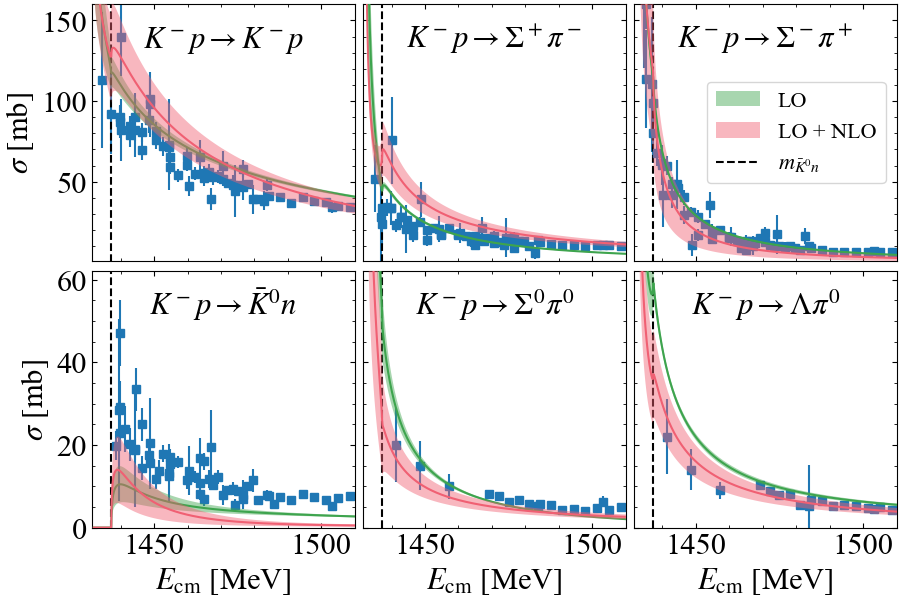

In [36]:
fig, ax = PyPlot.subplots(2, 3, figsize=(9, 6), layout="constrained", sharex=true, sharey=:row)
cc = colort[1]#:b#color[1]
mfc = cc
ax[1, 1].errorbar(Kmp_to_Kmp.Ecm, Kmp_to_Kmp.sigma, yerr=Kmp_to_Kmp.dsigma, fmt="s", c=cc, mfc=mfc)
ax[1, 2].errorbar(Kmp_to_Sigppim.Ecm, Kmp_to_Sigppim.sigma, yerr=Kmp_to_Sigppim.dsigma, fmt="s", c=cc, mfc=mfc)
ax[2, 2].errorbar(Kmp_to_Sig0pi0.Ecm, Kmp_to_Sig0pi0.sigma, yerr=Kmp_to_Sig0pi0.dsigma, fmt="s", c=cc, mfc=mfc)

ax[2, 1].errorbar(Kmp_to_Kbar0n.Ecm, Kmp_to_Kbar0n.sigma, Kmp_to_Kbar0n.dsigma, fmt="s", c=cc, mfc=mfc)
ax[1, 3].errorbar(Kmp_to_Sigmpip.Ecm, Kmp_to_Sigmpip.sigma, Kmp_to_Sigmpip.dsigma, fmt="s", c=cc, mfc=mfc)
ax[2, 3].errorbar(Kmp_to_Lampi0.Ecm, Kmp_to_Lampi0.sigma, Kmp_to_Lampi0.dsigma, fmt="s", c=cc, mfc=mfc)

# axtitle = [L"K^- p \to K^- p", L"K^- p \to \bar{K}^0 n", L"K^- p \to \Sigma^+ \pi^-", L"K^- p \to \Sigma^- \pi^+", L"K^- p \to \Sigma^0 \pi^0", L"K^- p \to \Lambda \pi^0"]

zorder = 5
zorder1 = 4
# Predicted by model with parameter fixed by energy levels
cc1 = color[3]
ax[1, 1].plot(w1, sigma_lo_11, c=cc1, zorder = zorder1)
ax[1, 2].plot(w2, sigma_lo_12, c=cc1, zorder = zorder1)
ax[2, 2].plot(w3, sigma_lo_13, c=cc1, zorder = zorder1)
ax[2, 1].plot(w4, sigma_lo_14, c=cc1, zorder = zorder1)
ax[1, 3].plot(w5, sigma_lo_15, c=cc1, zorder = zorder1)
ax[2, 3].plot(w6, sigma_lo_16, c=cc1, zorder = zorder1)
# error band at LO
alpha = 0.45


ax[1, 1].fill_between(w1, sigma_lo_11-simga_lo_11_error_band, sigma_lo_11+simga_lo_11_error_band, fc=cc1, alpha=alpha, zorder = zorder1)
ax[1, 2].fill_between(w2, sigma_lo_12-simga_lo_12_error_band, sigma_lo_12+simga_lo_12_error_band, fc=cc1, alpha=alpha, zorder = zorder1)
ax[2, 2].fill_between(w3, sigma_lo_13-simga_lo_13_error_band, sigma_lo_13+simga_lo_13_error_band, fc=cc1, alpha=alpha, zorder = zorder1)
ax[2, 1].fill_between(w4, sigma_lo_14-simga_lo_14_error_band, sigma_lo_14+simga_lo_14_error_band, fc=cc1, alpha=alpha, zorder = zorder1)
ax[1, 3].fill_between(w5, sigma_lo_15-simga_lo_15_error_band, sigma_lo_15+simga_lo_15_error_band, fc=cc1, alpha=alpha, zorder = zorder1, label="LO")
ax[2, 3].fill_between(w6, sigma_lo_16-simga_lo_16_error_band, sigma_lo_16+simga_lo_16_error_band, fc=cc1, alpha=alpha, zorder = zorder1)

# LO + NLO
cc2 = color[14]
ax[1, 1].plot(w1, sigma_nlo_11, c=cc2, zorder = zorder)
ax[1, 2].plot(w2, sigma_nlo_12, c=cc2, zorder = 3)
ax[2, 2].plot(w3, sigma_nlo_13, c=cc2, zorder = zorder)

ax[2, 1].plot(w4, sigma_nlo_14, c=cc2, zorder = 10)
ax[1, 3].plot(w5, sigma_nlo_15, c=cc2, zorder = zorder)
ax[2, 3].plot(w6, sigma_nlo_16, c=cc2, zorder = zorder)

#error band
ax[1, 1].fill_between(w1, sigma_nlo_11-simga_nlo_11_error_band, sigma_nlo_11+simga_nlo_11_error_band, fc=cc2, alpha=alpha, zorder = zorder)
ax[1, 2].fill_between(w2, sigma_nlo_12-simga_nlo_12_error_band, sigma_nlo_12+simga_nlo_12_error_band, fc=cc2, alpha=alpha, zorder = zorder)
ax[2, 2].fill_between(w3, sigma_nlo_13-simga_nlo_13_error_band, sigma_nlo_13+simga_nlo_13_error_band, fc=cc2, alpha=alpha, zorder = zorder)
ax[2, 1].fill_between(w4, sigma_nlo_14-simga_nlo_14_error_band, sigma_nlo_14+simga_nlo_14_error_band, fc=cc2, alpha=alpha, zorder = zorder)
ax[1, 3].fill_between(w5, sigma_nlo_15-simga_nlo_15_error_band, sigma_nlo_15+simga_nlo_15_error_band, fc=cc2, alpha=alpha, zorder = 3, label="LO + NLO")
ax[2, 3].fill_between(w6, sigma_nlo_16-simga_nlo_16_error_band, sigma_nlo_16+simga_nlo_16_error_band, fc=cc2, alpha=alpha, zorder = zorder)

ylim = [(10, 160), (0, 70), (0, 100), (0, 30), (0, 150), (0, 50)]

axtitle = [L"K^- p \to K^- p", 
L"K^- p \to \bar{K}^0 n", 
L"K^- p \to \Sigma^+ \pi^-", 
L"K^- p \to \Sigma^0 \pi^0", 
L"K^- p \to \Sigma^- \pi^+", 
L"K^- p \to \Lambda \pi^0"]
for (axx, yl, title) in zip(vec(ax), ylim, axtitle)
    # axx.set(xlim=(nothing, 1540), ylim=yl)
    axx.set_title(title, y=0.8, loc=:center)
    axx.vlines(1437.22, 0, 160, color=:k, ls="--", label=L"m_{\bar{K}^0n}")
end
for axx in ax[2, :]
    axx.set(xlabel=L"$E_\mathrm{cm}$ [MeV]")
end
ax[1, 1].set(xlim=(1431.5, 1510), ylim=(1, 160))
ax[2, 1].set(xlim=(1431.5, 1510), ylim=(0, 62))
ax[1, 1].set_ylabel(L"$\sigma$ [mb]")
ax[2, 1].set_ylabel(L"$\sigma$ [mb]")
ax[1, 3].legend(fontsize=16, loc=7)
fig.savefig("./figure/lambda1405_exp_data1.pdf")
gcf()

In [33]:
# fig, ax = PyPlot.subplots(2, 3, figsize=(14, 7), layout="constrained", sharex=true)
# cc = :b#color[1]#:b#color[1]
# mfc = cc
# ax[1, 1].errorbar(Kmp_to_Kmp.Ecm, Kmp_to_Kmp.sigma, yerr=Kmp_to_Kmp.dsigma, fmt="s", c=cc, mfc=mfc)
# ax[1, 2].errorbar(Kmp_to_Sigppim.Ecm, Kmp_to_Sigppim.sigma, yerr=Kmp_to_Sigppim.dsigma, fmt="s", c=cc, mfc=mfc)
# ax[1, 3].errorbar(Kmp_to_Sig0pi0.Ecm, Kmp_to_Sig0pi0.sigma, yerr=Kmp_to_Sig0pi0.dsigma, fmt="s", c=cc, mfc=mfc)

# ax[2, 1].errorbar(Kmp_to_Kbar0n.Ecm, Kmp_to_Kbar0n.sigma, Kmp_to_Kbar0n.dsigma, fmt="s", c=cc, mfc=mfc)
# ax[2, 2].errorbar(Kmp_to_Sigmpip.Ecm, Kmp_to_Sigmpip.sigma, Kmp_to_Sigmpip.dsigma, fmt="s", c=cc, mfc=mfc)
# ax[2, 3].errorbar(Kmp_to_Lampi0.Ecm, Kmp_to_Lampi0.sigma, Kmp_to_Lampi0.dsigma, fmt="s", c=cc, mfc=mfc)

# axtitle = [L"K^- p \to K^- p", L"K^- p \to \bar{K}^0 n", L"K^- p \to \Sigma^+ \pi^-", L"K^- p \to \Sigma^- \pi^+", L"K^- p \to \Sigma^0 \pi^0", L"K^- p \to \Lambda \pi^0"]

# zorder = 2
# zorder1 = 4
# # Predicted by model with parameter fixed by energy levels
# cc1 = color[3]
# ax[1, 1].plot(w1, sigma_lo_11, c=cc1, zorder = zorder1)
# ax[1, 2].plot(w2, sigma_lo_12, c=cc1, zorder = zorder1)
# ax[1, 3].plot(w3, sigma_lo_13, c=cc1, zorder = zorder1)
# ax[2, 1].plot(w4, sigma_lo_14, c=cc1, zorder = zorder1)
# ax[2, 2].plot(w5, sigma_lo_15, c=cc1, zorder = zorder1)
# ax[2, 3].plot(w6, sigma_lo_16, c=cc1, zorder = zorder1)
# # error band at LO
# alpha = 0.45


# ax[1, 1].fill_between(w1, sigma_lo_11-simga_lo_11_error_band, sigma_lo_11+simga_lo_11_error_band, fc=cc1, alpha=alpha, label="LO", zorder = zorder1)
# ax[1, 2].fill_between(w2, sigma_lo_12-simga_lo_12_error_band, sigma_lo_12+simga_lo_12_error_band, fc=cc1, alpha=alpha, zorder = zorder1)
# ax[1, 3].fill_between(w3, sigma_lo_13-simga_lo_13_error_band, sigma_lo_13+simga_lo_13_error_band, fc=cc1, alpha=alpha, zorder = zorder1)
# ax[2, 1].fill_between(w4, sigma_lo_14-simga_lo_14_error_band, sigma_lo_14+simga_lo_14_error_band, fc=cc1, alpha=alpha, zorder = zorder1)
# ax[2, 2].fill_between(w5, sigma_lo_15-simga_lo_15_error_band, sigma_lo_15+simga_lo_15_error_band, fc=cc1, alpha=alpha, zorder = zorder1)
# ax[2, 3].fill_between(w6, sigma_lo_16-simga_lo_16_error_band, sigma_lo_16+simga_lo_16_error_band, fc=cc1, alpha=alpha, zorder = zorder1)

# # LO + NLO
# cc2 = color[14]
# ax[1, 1].plot(w1, sigma_nlo_11, c=cc2, zorder = zorder)
# ax[1, 2].plot(w2, sigma_nlo_12, c=cc2, zorder = zorder)
# ax[1, 3].plot(w3, sigma_nlo_13, c=cc2, zorder = zorder)
# ax[2, 1].plot(w4, sigma_nlo_14, c=cc2, zorder = zorder)
# ax[2, 2].plot(w5, sigma_nlo_15, c=cc2, zorder = zorder)
# ax[2, 3].plot(w6, sigma_nlo_16, c=cc2, zorder = zorder)

# # error band
# ax[1, 1].fill_between(w1, sigma_nlo_11-simga_nlo_11_error_band, sigma_nlo_11+simga_nlo_11_error_band, fc=cc2, alpha=alpha, label="LO + NLO", zorder = zorder)
# ax[1, 2].fill_between(w2, sigma_nlo_12-simga_nlo_12_error_band, sigma_nlo_12+simga_nlo_12_error_band, fc=cc2, alpha=alpha, zorder = zorder)
# ax[1, 3].fill_between(w3, sigma_nlo_13-simga_nlo_13_error_band, sigma_nlo_13+simga_nlo_13_error_band, fc=cc2, alpha=alpha, zorder = zorder)
# ax[2, 1].fill_between(w4, sigma_nlo_14-simga_nlo_14_error_band, sigma_nlo_14+simga_nlo_14_error_band, fc=cc2, alpha=alpha, zorder = zorder)
# ax[2, 2].fill_between(w5, sigma_nlo_15-simga_nlo_15_error_band, sigma_nlo_15+simga_nlo_15_error_band, fc=cc2, alpha=alpha, zorder = 3)
# ax[2, 3].fill_between(w6, sigma_nlo_16-simga_nlo_16_error_band, sigma_nlo_16+simga_nlo_16_error_band, fc=cc2, alpha=alpha, zorder = zorder)

# ylim = [(10, 160), (0, 65), (0, 100), (0, 150), (0, 30), (0, 50)]

# for (axx, yl, title) in zip(vec(ax), ylim, axtitle)
#     axx.set(xlim=(nothing, 1540), ylim=yl)
#     axx.set_title(title)#, y=0.85, loc=:right)
#     axx.vlines(1437.22, yl..., color=:k, ls="--", label=L"m_{\bar{K}^0n}")
# end
# for axx in ax[2, :]
#     axx.set(xlabel=L"$E_\mathrm{cm}$ [MeV]")
# end
# ax[1, 1].set_ylabel(L"$\sigma$ [mb]")
# ax[2, 1].set_ylabel(L"$\sigma$ [mb]")
# ax[1, 1].legend()
# # fig.savefig("./figure/lambda1405_exp_data.pdf", facecolor="none")
# gcf()